In [8]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
sns.set()

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
%cd /content/drive/My Drive/Colab Notebooks/ML_project/data

/content/drive/My Drive/Colab Notebooks/ML_project/data


Let's load the dataset and look at the data. 

In [11]:
df0 = pd.read_csv('./train.csv')
df0.head()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,s,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,100001,b,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,100002,b,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,100003,b,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
4,100004,b,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


Number of rows and features:


In [12]:
df0.shape

(250000, 32)

We should check the content of dataset: is there any NaN values? 

In [13]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Id                           250000 non-null  int64  
 1   Prediction                   250000 non-null  object 
 2   DER_mass_MMC                 250000 non-null  float64
 3   DER_mass_transverse_met_lep  250000 non-null  float64
 4   DER_mass_vis                 250000 non-null  float64
 5   DER_pt_h                     250000 non-null  float64
 6   DER_deltaeta_jet_jet         250000 non-null  float64
 7   DER_mass_jet_jet             250000 non-null  float64
 8   DER_prodeta_jet_jet          250000 non-null  float64
 9   DER_deltar_tau_lep           250000 non-null  float64
 10  DER_pt_tot                   250000 non-null  float64
 11  DER_sum_pt                   250000 non-null  float64
 12  DER_pt_ratio_lep_tau         250000 non-null  float64
 13 

There is no NaN values!

Let's analyze the distribution of target class: 

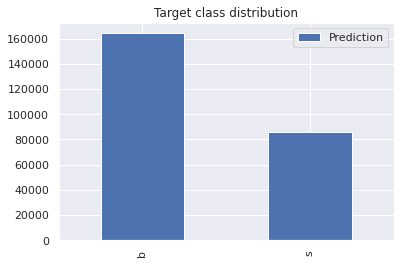

In [14]:
df0['Prediction'].value_counts().plot(kind='bar', label='Prediction')
plt.legend()
plt.title('Target class distribution');

All the features are quantitive, that's why we can calculate correlation between them. In order to visualise it we will plot a correlation matrix. 

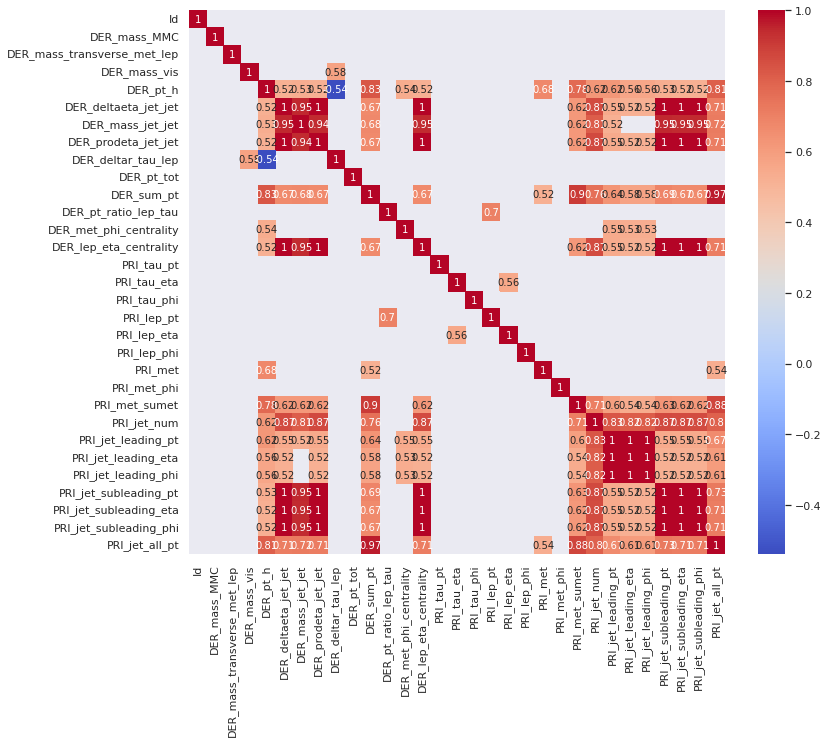

In [15]:
corr = df0.corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='coolwarm', annot=True, annot_kws={"size": 10});

We can notice that some features are strongly correlated, let's try to remove them and build a correlation matrix without them.

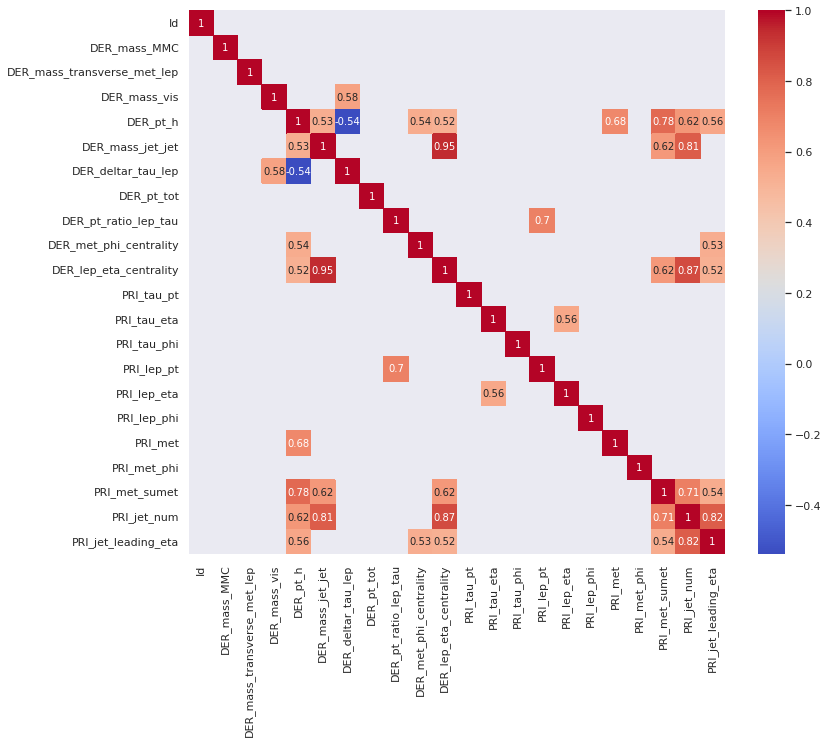

In [16]:
correlated = ['PRI_jet_subleading_pt', 'DER_deltaeta_jet_jet', 'PRI_jet_subleading_phi', 'PRI_jet_leading_pt',
       'PRI_jet_subleading_eta', 'DER_prodeta_jet_jet', 'PRI_jet_leading_phi',  'PRI_jet_all_pt', 'DER_sum_pt']
corr = df0.drop(correlated, axis=1).corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='coolwarm', annot=True, annot_kws={"size": 10});

Let's consider the distributions of quantities, for this we display histograms of quantitative features.

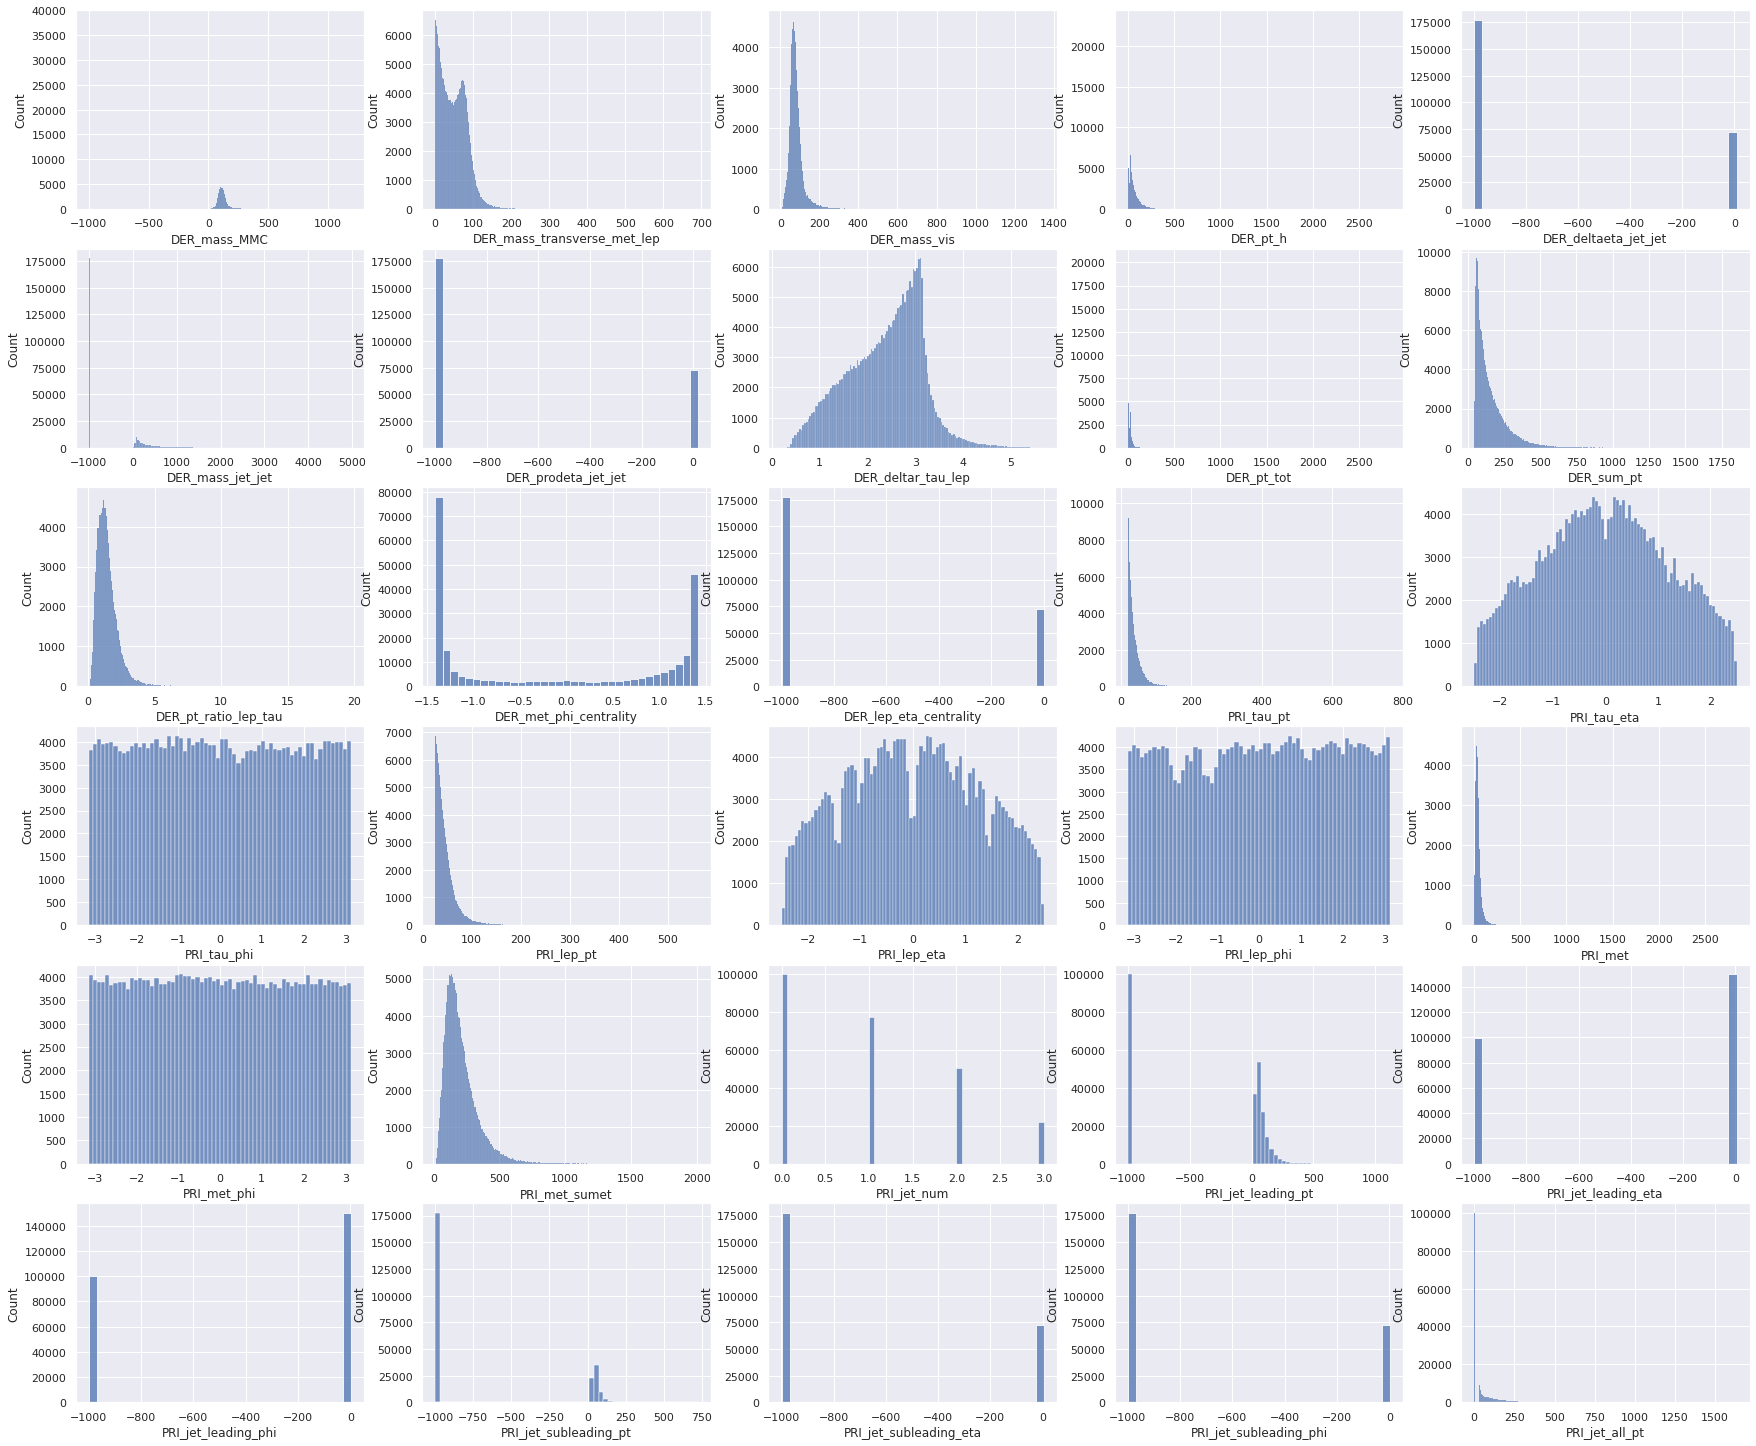

In [18]:
f = plt.figure(figsize=(30, 30))
gs = f.add_gridspec(7, 5)

for idx, elem in enumerate(df0.columns[2:]):
  f.add_subplot(gs[idx // 5, idx % 5])
  sns.histplot(df0[elem])

Based on the histograms, it can be concluded that data is distributed according to normal, uniform, bimodal, log-normal laws. A lot of features contain outliers values -999 which can be a sign of incorrect operation of the particle sensor under certain conditions. 

In [11]:
df0.agg(['mean', 'median'])

,Id,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
mean,224999.5,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.3731,18.917332,158.432217,1.437609,-0.128305,-708.985189,38.707419,-0.010973,-0.008171,46.660207,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591
median,224999.5,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.4915,12.315500,120.664500,1.280000,-0.356000,-999.000000,31.804000,-0.023000,-0.033000,40.516000,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500


We should consider scatter diagrams of pairs of features to analyze the relationships between them.

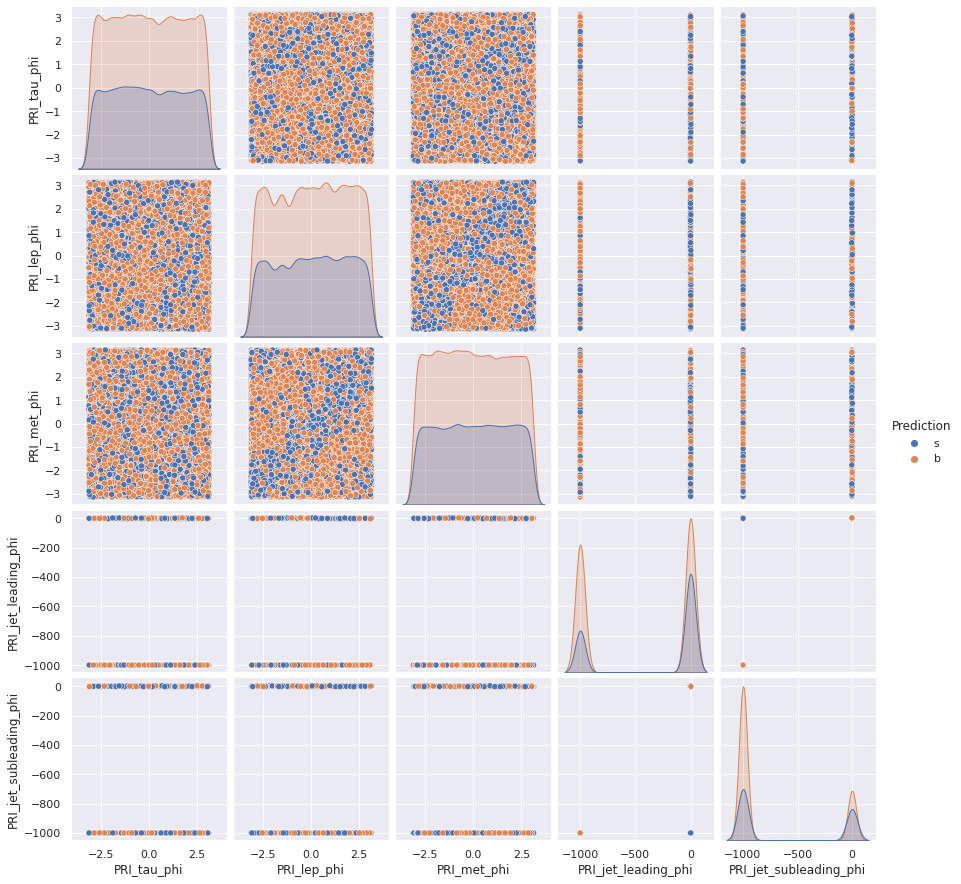

In [25]:
sns.pairplot(df0[[col for col in df0.columns[1:] if col.endswith("phi") or col == "Prediction"]], hue='Prediction')

The graph shows that the data with the ending phi is not significantly informative, which means that we can delete them to reduce the dimension.